In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
# Generate a synthetic dataset
np.random.seed(0)
sample_size = 1000
data = {
    'age': np.random.randint(18, 70, sample_size),
    'income': np.random.randint(20000, 100000, sample_size),
    'gender': np.random.choice(['Male', 'Female'], sample_size),
    'purchased': np.random.choice([0, 1], sample_size, p=[0.7, 0.3])
}
df = pd.DataFrame(data)

In [8]:
# Convert categorical variable 'gender' to numerical
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Define features and target variable
X = df.drop('purchased', axis=1)
y = df['purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       137
           1       0.31      0.35      0.33        63

    accuracy                           0.55       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.56      0.55      0.56       200

Confusion Matrix:
[[88 49]
 [41 22]]


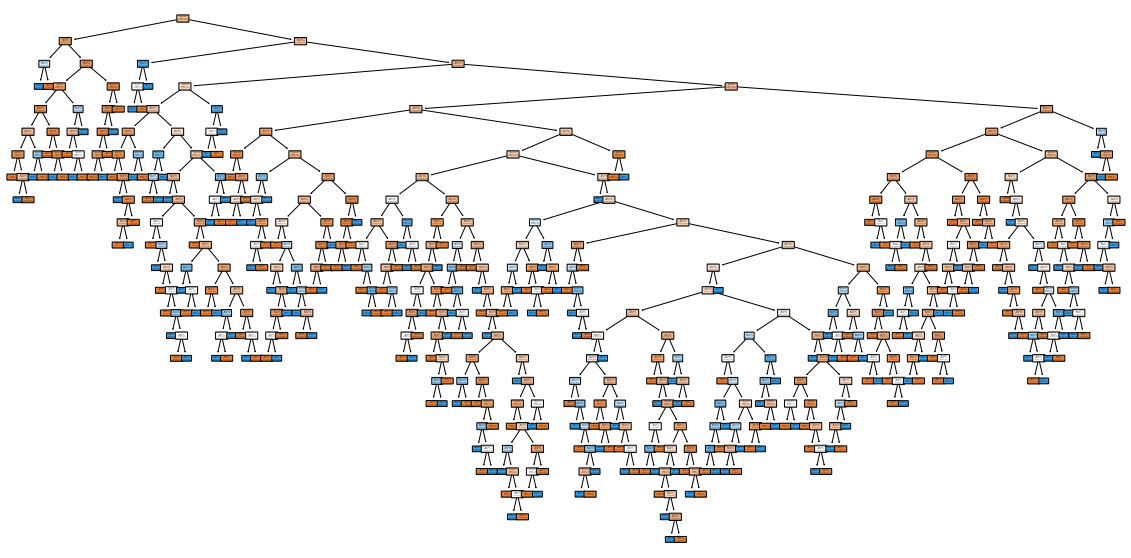

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True, rounded=True)
plt.show()